# Westbound Traffic on The I-94 Interstate Highway

The goal of this analysis is to determine any indicators of heavy traffic on the I-94 (From Saint Paul to Minneapolis)

## First we read in the dataset
The data was made available by John Hogue, and you can download it [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). The link also includes the documentation for the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

## Basic exploring

In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


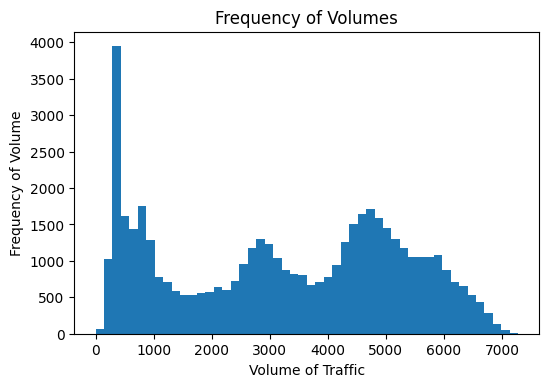

In [6]:
%matplotlib inline
traffic_volume = traffic['traffic_volume']

plt.hist(traffic_volume, bins =50)
plt.title('Frequency of Volumes')
plt.xlabel('Volume of Traffic')
plt.ylabel('Frequency of Volume')
plt.show()

In [7]:
traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

* We have 3 main frequencies of volume
* 25% of the time we have around 1200, whereas another 25% shows almost 5000. 
* I suspect this has something to do with time of day - Low frequencies while people are at work and not traveling, and spikes around lunch time, or communte to/from home
* Since we are measuring 24 hours a day, it also could be that frequency is lower at night than in the day (since 25% is such a large portion of the sample)

## Daytime vs Nighttime

In [8]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [9]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [10]:
traffic['hour'] = traffic['date_time'].dt.hour

In [11]:
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13
...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22


In [12]:
daytime_df = traffic.copy()[traffic['hour'].between(7,19)]
nighttime_df = traffic.copy()[(traffic['hour'] > 19) | (traffic['hour'] < 7)]

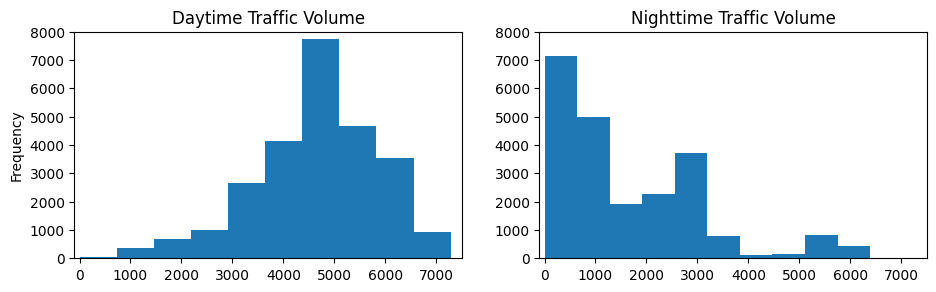

In [13]:
plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
plt.hist(daytime_df['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Daytime Traffic Volume')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(nighttime_df['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Nighttime Traffic Volume')
plt.show()

* Both graphs contain a skew. Daytime traffic is skewed towards higher volumes, and nighttime traffic is skewed towards lower volumes.

* Since our goal was to find indicators of heavy traffic, we will use our daytime dataframe moving foward.

## Testing Time (Months)

Lets Start by sorting months. The purpose of testing times is to see if months, days, or hours contain any indication of heavy traffic

In [15]:
daytime_df['month'] = daytime_df['date_time'].dt.month
by_month = daytime_df.groupby('month').mean()

In [16]:
by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour
month,,,,,,
1,265.511206,0.014472,0.000586,58.309912,4385.217310,12.857608
2,266.752923,0.003719,0.000000,51.790981,4593.187798,12.848806
3,273.718389,0.019037,0.000000,56.812968,4761.529676,12.906733
4,279.772307,0.102067,0.000000,59.682040,4771.232816,13.020399
5,289.450880,0.131043,0.000000,56.537114,4788.966639,12.984153
6,294.745770,0.273636,0.000000,48.218964,4791.087488,12.923754
7,296.936653,4.098948,0.000000,41.786521,4502.628360,12.874951
8,295.248155,0.229456,0.000000,42.436403,4818.434690,12.877516
9,292.569386,0.297568,0.000000,45.089788,4755.709916,12.935372


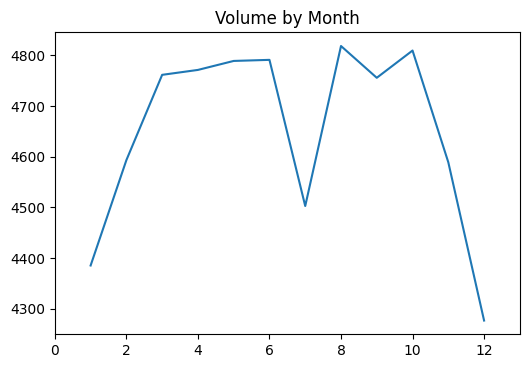

In [20]:
plt.plot(by_month['traffic_volume'])
plt.title('Volume by Month')
plt.xlim(0,13)
plt.show()

* Colder months are generally showing less volume in traffic, and warmer months showing higher traffic. 

* Colder months could easily mean ice, snow, or sleet affecting drivers ability to drive safely. 

* We also see a strange dip in July, whereas the 'pattern' should indicate a high volume of traffic. This could easily indicate some road work, or missing data, we would need to investigate furthur (Since the chart is using labels not at 0, it may not be a significant indicator at all)

## Testing Time (Days)

In [22]:
daytime_df['dayofweek'] = daytime_df['date_time'].dt.dayofweek
by_dayofweek = daytime_df.groupby('dayofweek').mean()

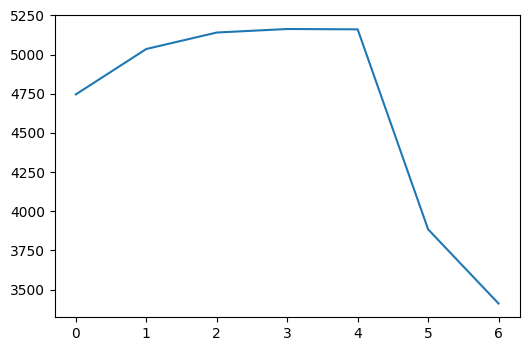

In [23]:
plt.plot(by_dayofweek['traffic_volume'])
plt.show()

* When the weekend hits, volume of traffic goes way down. Probably less commuting to work, and less opportunity for errands/appointments on weekends.

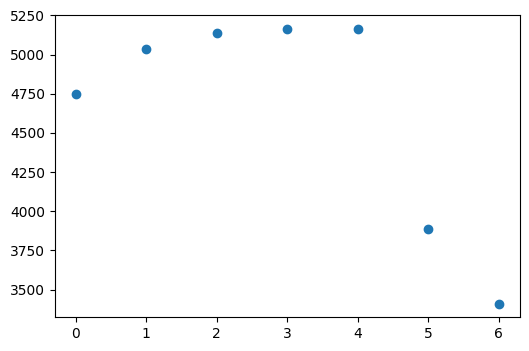

In [40]:
plt.scatter(by_dayofweek.index, by_dayofweek['traffic_volume'])
plt.show()

* I wanted a little better view of exactly what the averages were per day. On weekdays we can expect higher traffic at 4750 or above. It might be a good idea to single out weekdays as those seem to be high indicators of heavy traffic

## Testing Time (Hours)

In [41]:
weekdays = daytime_df[daytime_df['dayofweek'] < 5]
weekend = daytime_df[daytime_df['dayofweek'] >= 5]

In [52]:
by_hour_weekdays = weekdays.groupby('hour').mean()

In [54]:
by_hour_weekend = weekend.groupby('hour').mean()

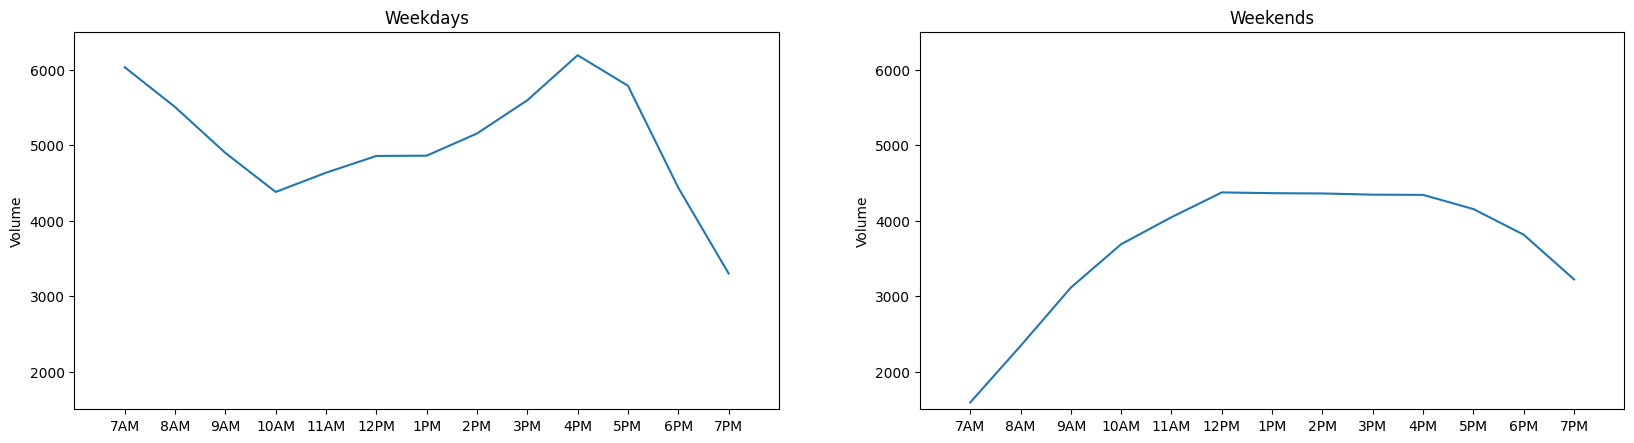

In [85]:
hours = ['7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM']
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.plot(by_hour_weekdays['traffic_volume'])
plt.title('Weekdays')
plt.xlim(6,20)
plt.xticks(ticks=by_hour_weekdays.index, labels=hours)
plt.ylabel('Volume')
plt.ylim(1500,6500)

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Weekends')
plt.xlim(6,20)
plt.xticks(ticks=by_hour_weekend.index, labels=hours)
plt.ylabel('Volume')
plt.ylim(1500,6500)
plt.show()

## Summarizing Time

* Traffic is generally heaviest during warmer months


* The pattern of commuting to and from work is supported in the graphs above with peak commute times being at 7AM and 5PM.


* Weekdays overall have a much higher volume, and shows heavy spiking at our peak times


* Weekends have a much lower frequency, and its much more steady thoughout the day. It has almost an inverse pattern showing lows/declines around the typical weekday commute times

## Correlations with weather

In [88]:
daytime_df.corr()['traffic_volume']

temp              0.118084
rain_1h           0.004020
snow_1h           0.003768
clouds_all       -0.033410
traffic_volume    1.000000
hour             -0.007369
month            -0.017397
dayofweek        -0.371023
Name: traffic_volume, dtype: float64

Weather doesnt seem to have a significant correlation with traffic volume, which is suprising. 

[]

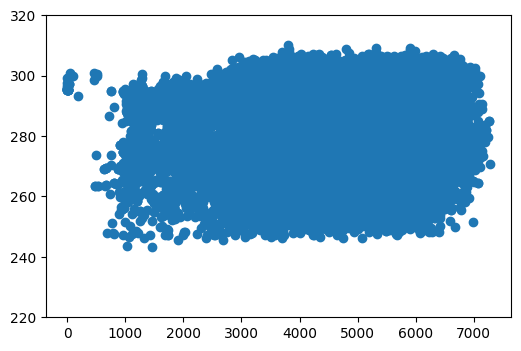

In [94]:
plt.scatter(daytime_df['traffic_volume'], daytime_df['temp'])
plt.ylim(220,320)
plt.plot()

Lets check the weather columns specifically now

In [96]:
by_weather_main = daytime_df.groupby('weather_main').mean()
by_weather_description = daytime_df.groupby('weather_description').mean()

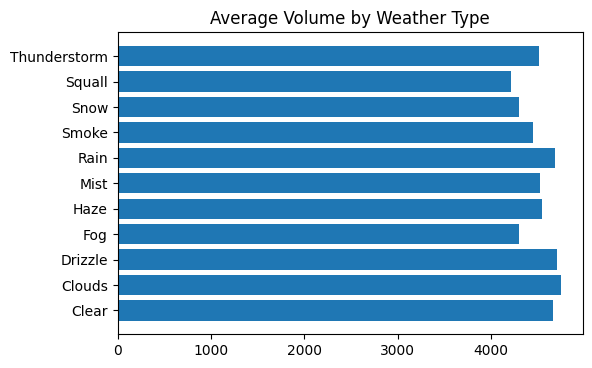

In [104]:
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])
plt.title('Average Volume by Weather Type')
plt.show()

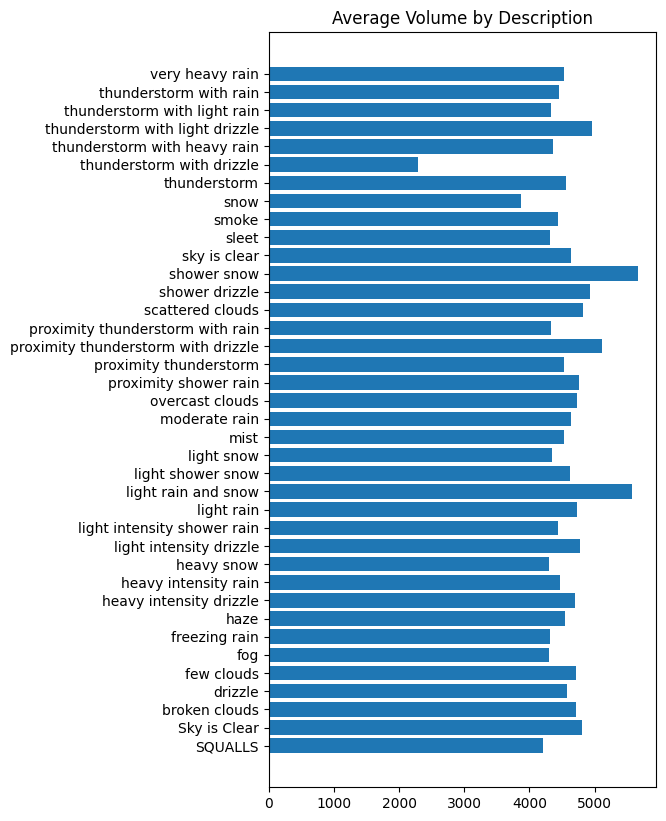

In [108]:
plt.figure(figsize = (5,10))
plt.barh(by_weather_description.index, by_weather_description['traffic_volume'])
plt.title('Average Volume by Description')
plt.show()

There are two types of weather it seems to have the most average traffic volume: light rain and snow, and shower snow. This means that these weather types are typically slowing or congesting traffic in some way.

# Conclusion

Traffic volume & Time:

>Traffic is generally heaviest during warmer months

>The pattern of commuting to and from work is supported in the graphs above with peak commute times being at 7AM and 5PM.

>Weekdays overall have a much higher volume, and shows heavy spiking at our peak times

>Weekends have a much lower frequency, and its much more steady thoughout the day. It has almost an inverse pattern showing lows/declines around the typical weekday commute times

Weather:

> Had no significant correlation with traffic volume

> light rain and snow & shower snow had the highest average traffic volumes at above 5000